# TITANIC DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic=pd.read_csv('/content/drive/MyDrive/dataset/train (1).csv')

In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

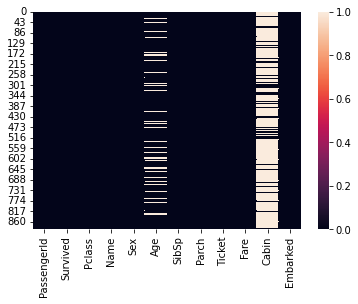

In [ ]:
sns.heatmap(titanic.isna())

In [ ]:
titanic['Age'].isna().sum()/len(titanic['Age'])*100

19.865319865319865

In [ ]:
titanic['Cabin'].isna().sum()/len(titanic['Cabin'])*100

77.10437710437711

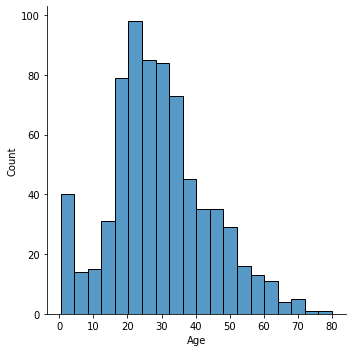

In [ ]:
sns.displot(x='Age',data=titanic)

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [ ]:
titanic['Age'].isna().sum()

0

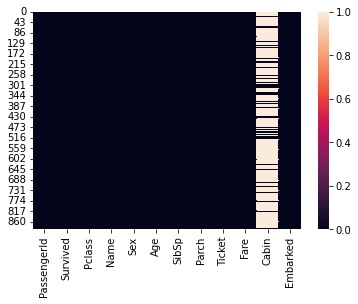

In [ ]:
sns.heatmap(titanic.isna())

In [ ]:
titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [ ]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

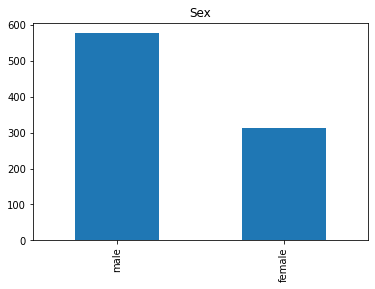

In [ ]:
titanic['Sex'].value_counts().plot(kind='bar',title='Sex')
plt.show()

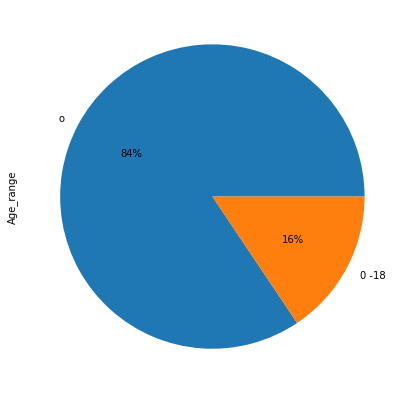

In [ ]:
titanic['Age_range']=np.where((titanic['Age']>0) & (titanic['Age']<=18),'0 -18','o') 
titanic['Age_range'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.0f%%')

In [ ]:
df=titanic

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,o
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,o
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,o
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,o
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,o
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,o
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,o
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,o
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,o


In [ ]:
titanic['Age_range']=np.where((titanic['Age']>0) & (titanic['Age']<=18),'minor',titanic['Age_range'])
titanic['Age_range']=np.where((titanic['Age']>=18) & (titanic['Age']<=30),'young',titanic['Age_range'])
titanic['Age_range']=np.where((titanic['Age']>30) & (titanic['Age']<=45),'middle',titanic['Age_range'])
titanic['Age_range']=np.where((titanic['Age']>45) & (titanic['Age']<=60),'agedpeople',titanic['Age_range'])
titanic['Age_range']=np.where((titanic['Age']>60) & (titanic['Age']<=90),'older',titanic['Age_range'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,middle
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,middle
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,young
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,young


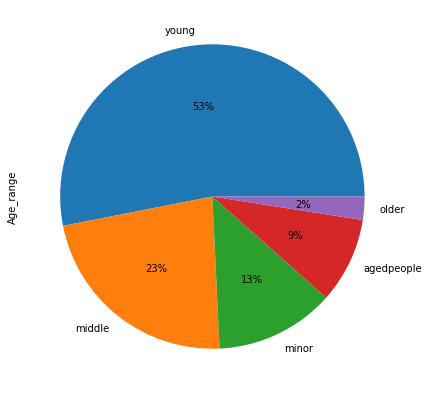

In [ ]:
titanic['Age_range'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.0f%%')

Text(0.5, 1.0, 'Travil')

<Figure size 1440x1440 with 0 Axes>

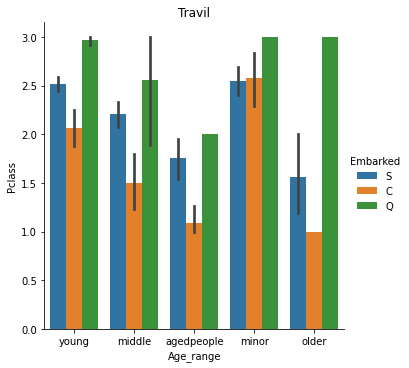

In [ ]:
plt.figure(figsize=(20,20))
g=sns.catplot(data=titanic,kind="bar",x="Age_range",y="Pclass",hue="Embarked")
plt.title("Travil")

In [ ]:
dt=pd.crosstab(titanic['Sex'],titanic['Embarked'])
print(dt)

Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441


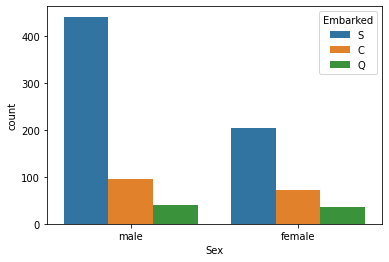

In [ ]:
sns.countplot(x='Sex', hue='Embarked', data=titanic);

In [ ]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



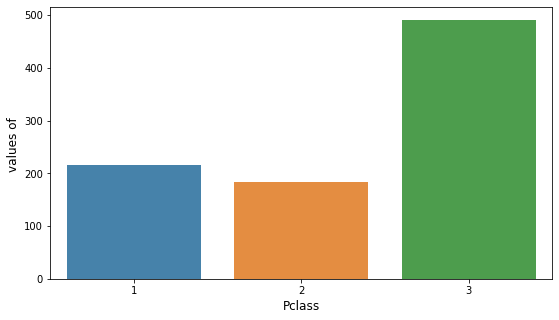

In [ ]:
olor=sns.color_palette()

int_level = titanic['Pclass'].value_counts()

plt.figure(figsize=(9,5))
sns.barplot(int_level.index,int_level.values,alpha=0.9)
plt.ylabel('values of ',fontsize=12)
plt.xlabel('Pclass',fontsize=12)
plt.show()

In [ ]:
dt1=pd.crosstab(titanic['Sex'],titanic['Pclass'])
print(dt1)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


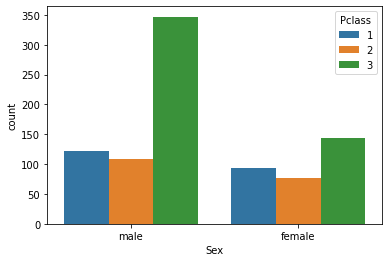

In [ ]:
sns.countplot(x='Sex', hue='Pclass', data=titanic);

Text(0.5, 1.0, 'Travil')

<Figure size 1440x1440 with 0 Axes>

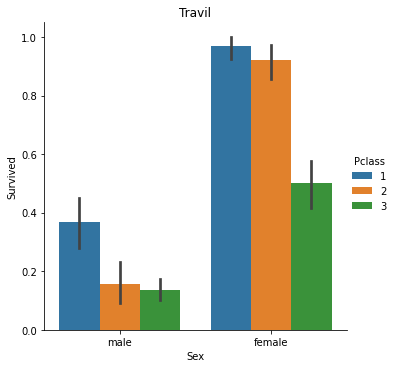

In [ ]:
plt.figure(figsize=(20,20))
g=sns.catplot(data=titanic,kind="bar",x="Sex",y="Survived",hue="Pclass")
plt.title("Travil")

Text(0.5, 1.0, 'Travil')

<Figure size 1440x1440 with 0 Axes>

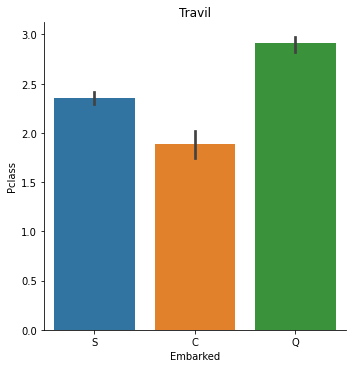

In [ ]:
plt.figure(figsize=(20,20))
g=sns.catplot(data=titanic,kind="bar",x="Embarked",y="Pclass",)
plt.title("Travil")

In [ ]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



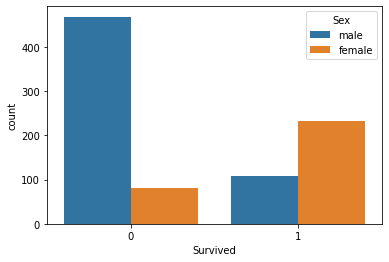

In [ ]:
sns.countplot('Survived',data=titanic,hue='Sex')

In [ ]:
corrmat = titanic.corr()

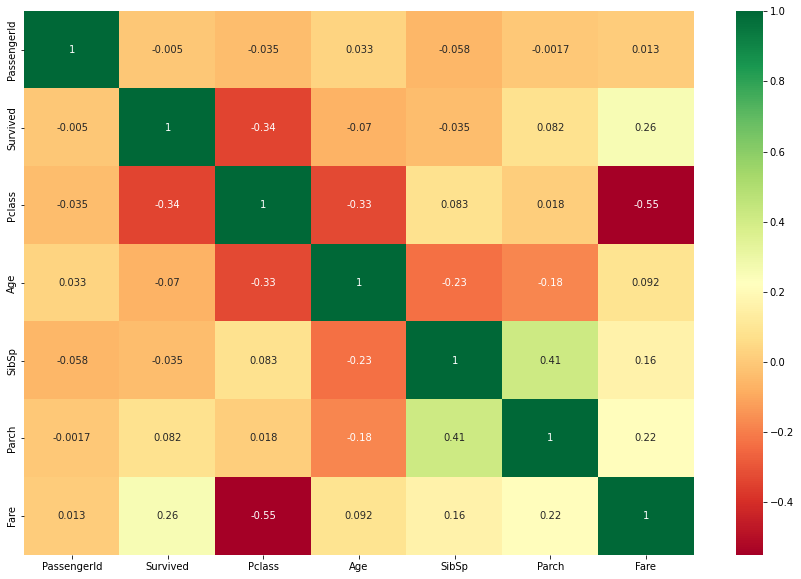

In [ ]:
top_corr_feature = corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(titanic[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


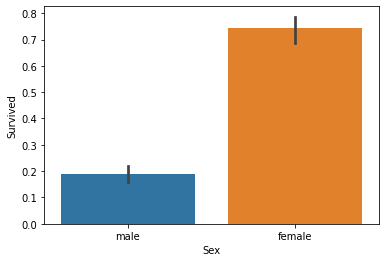

In [ ]:
sns.barplot(x="Sex", y="Survived", data=titanic)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


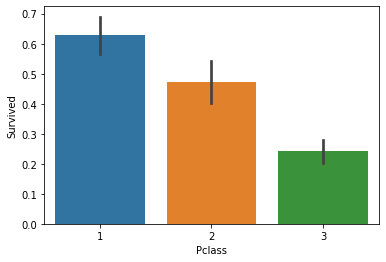

In [ ]:
#Pclass
sns.barplot(x="Pclass", y="Survived", data=titanic)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", titanic["Survived"][titanic["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", titanic["Survived"][titanic["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", titanic["Survived"][titanic["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [ ]:
df_num = titanic[['Age','SibSp','Parch','Fare']]
df_cat = titanic[['Survived','Pclass','Sex','Ticket','Embarked']]

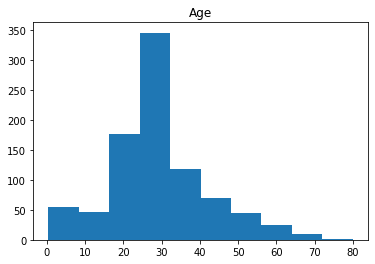

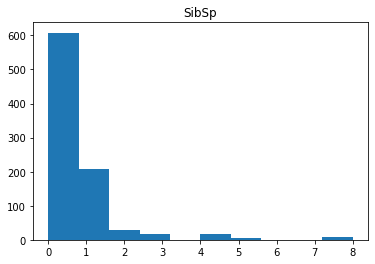

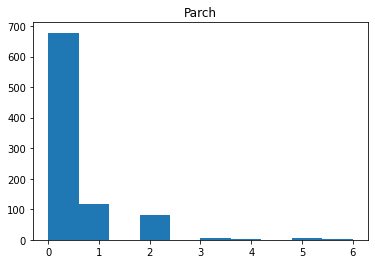

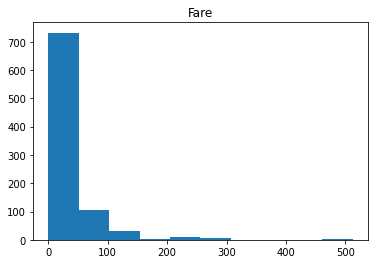

In [ ]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [ ]:
#So as you can see, most of the distributions are scattered, except Age, it’s pretty normalized. We might consider normalizing them later on. Next, we plot a correlation heatmap between the numeric columns:

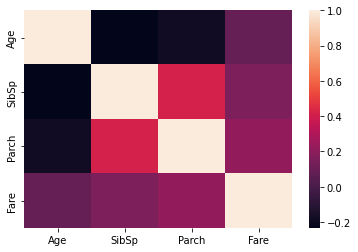

In [ ]:
sns.heatmap(df_num.corr())

In [ ]:
#Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together. Next, let us compare survival rates across the numeric variables. This might reveal some interesting insights:

In [ ]:
pd.pivot_table(titanic, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


The inference we can draw from this table is:

1. The average age of survivors is 28, so young people tend to survive more.
2. People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
 3. In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
 4. And if you are a child, and have siblings, you have less of a chance of surviving

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



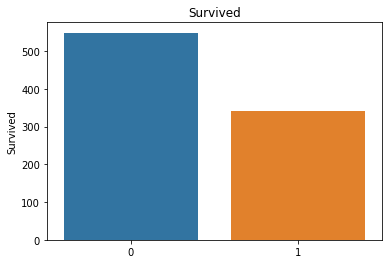

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



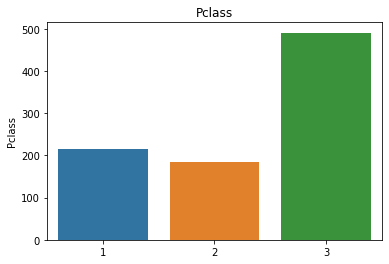

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



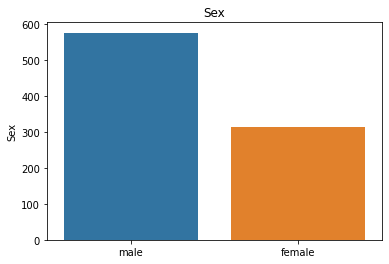

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



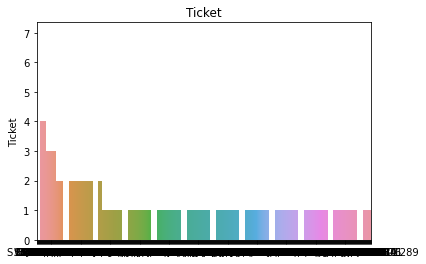

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



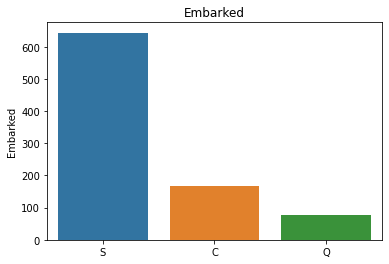

In [ ]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

The Ticket and Cabin graphs look very messy, we might have to feature engineer them! Other than that, the rest of the graphs tells us:

1. Survived: Most of the people died in the shipwreck,  only around 300 people survived.
2. Pclass: The majority of the people traveling, had tickets to the 3rd class.
3. Sex: There were more males than females aboard the ship, roughly double the amount.
4. Embarked: Most of the passengers boarded the ship from Southampton.

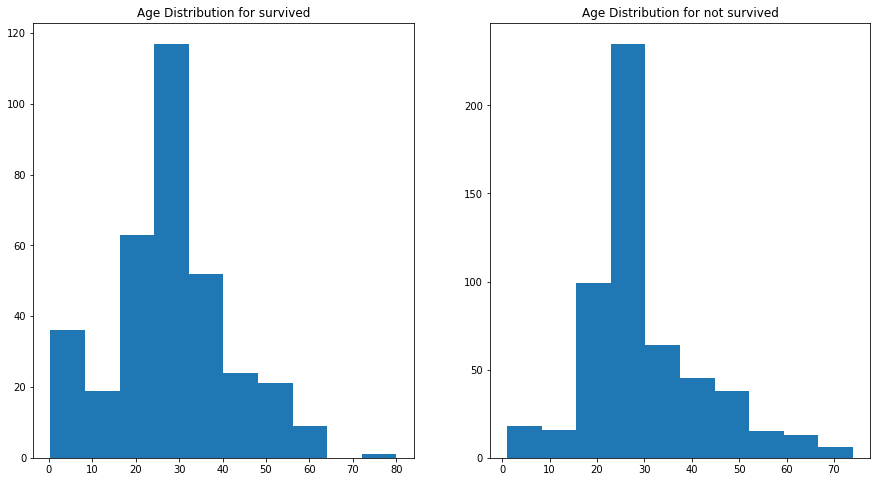

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 8)
ax1.hist(df[df['Survived'] == 1]['Age']);
ax1.set_title('Age Distribution for survived');

ax2.hist(df[df['Survived'] == 0]['Age']);
ax2.set_title('Age Distribution for not survived');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



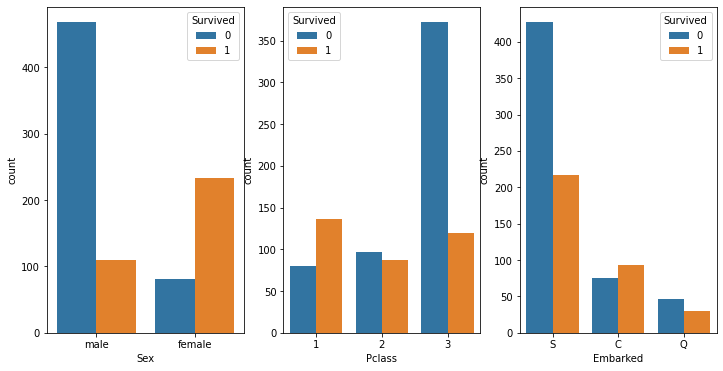

In [ ]:
fig, ax = plt.subplots(1,3 , figsize=(12, 6))


# Countplot for survived based on Gender
sns.countplot("Sex", hue="Survived", data=df, ax=ax[0]) 

# Countplot for survived base on Pclass
sns.countplot("Pclass", hue='Survived', data=df, ax=ax[1]) 

# Countplot for survived base on Embarked
sns.countplot("Embarked", hue='Survived', data=df, ax=ax[2])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/train (1).csv')
fig = px.scatter_3d(df, x='PassengerId', y='Sex', z='Age',
                    color='Age')
fig.show()